# Import Dependencies

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Parameters

In [2]:
# Set the Seed
randomSeed = 1000
pd.set_option('display.max_columns', None)

# Initialize DataFrame


In [3]:
df_nan = pd.read_csv('full_data_files/finalDFwithNaN.csv', sep=';', index_col=0)
df_man = pd.read_csv('full_data_files/DFimputedMan.csv', sep=',', index_col=0)
df_man.columns = df_nan.columns


In [4]:
df_man.columns

Index(['Price', 'Age', 'Condition', 'Draught', 'Displacement',
       'Certified No. of Persons', 'Engine Hours', 'No. of Cabins',
       'No. of berths', 'No. of Bathrooms', 'Headroom', 'Toilets', 'Showers',
       'Length', 'Beam', 'Negotiation Possible', 'Taxes Paid',
       'CE Design Category_A - Ocean', 'CE Design Category_B - Offshore',
       'CE Design Category_C - Inshore',
       'CE Design Category_D - Sheltered Waters', 'CE Design Category_nan',
       'Hull Type_Planing', 'Hull Type_displacement',
       'Hull Type_semi-displacement', 'Hull Type_nan', 'Material_Aluminium',
       'Material_Carbon Fiber', 'Material_Ferro Cement', 'Material_GRP',
       'Material_Hypalon', 'Material_PVC', 'Material_Polyethylene',
       'Material_Rubber', 'Material_Steel', 'Material_Wood', 'Material_nan',
       'Sailing Vessel', 'Motorized Vessel', 'Small Equipment Index',
       'Big Equipment Index', 'Equipment Not Listed', 'Total Horsepower',
       'Fuel Capacity', 'Mainsail Area', 'Ji

In [ ]:
# replace true/false values in df_nan with 1/0
df_nan = df_nan.replace({True: 1, False: 0})

create df_man_PCA dataset

c:\Users\a1224\Henry Heppe\SeminarML3\SeminarML\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


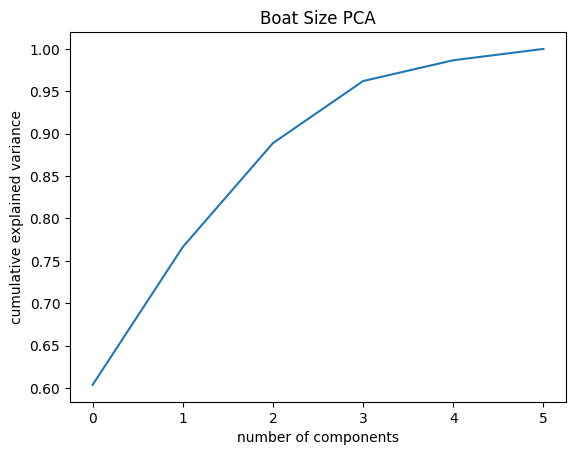

c:\Users\a1224\Henry Heppe\SeminarML3\SeminarML\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


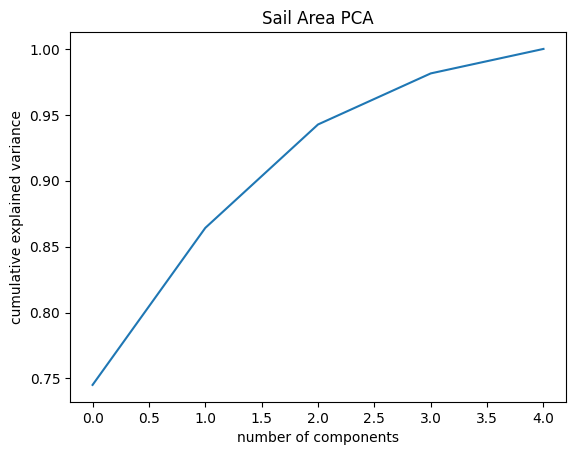

In [21]:
df_man_PCA = df_man.copy()
#apply pca to 'Certified No of Persons', 'No. of Cabins', 'No. of berths', 'No of Bathrooms', 'Toilets', 'Showers'
pca = PCA(n_components=6)
relevant_cols = ['Certified No. of Persons', 'No. of Cabins', 'No. of berths', 'No. of Bathrooms', 'Toilets', 'Showers']
pca.fit(StandardScaler().fit_transform(df_man_PCA[relevant_cols]))
df_man_PCA['Boat Size Component'] = pca.transform(df_man_PCA[relevant_cols])[:,0]
df_man_PCA = df_man_PCA.drop(relevant_cols, axis=1)

#plot the scree plot for the pca
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Boat Size PCA')
plt.show()

#apply to sail area
pca = PCA(n_components=5)
relevant_cols = ['Mainsail Area', 'Jib Area', 'Genoa Area', 'Gennaker Area', 'Spinnaker Area']
pca.fit(StandardScaler().fit_transform(df_man_PCA[relevant_cols]))
df_man_PCA['Sail Area Component'] = pca.transform(df_man_PCA[relevant_cols])[:,0]
df_man_PCA = df_man_PCA.drop(relevant_cols, axis=1)

#plot the scree plot for the pca
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Sail Area PCA')
plt.show()

Create df_man_noNanCat (in research report noNanCat is called BaseCat)

In [6]:
df_man_noNanCat = df_man
df_man_noNanCat = df_man_noNanCat.loc[:,~df_man_noNanCat.columns.str.contains('_nan')]

Create df_freq datasets

In [13]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df_nan)
df_freq = imputer.transform(df_nan)
df_freq = pd.DataFrame(df_freq, columns=df_nan.columns, index=df_nan.index)

Create df_freq_PCA dataset

c:\Users\a1224\Henry Heppe\SeminarML3\SeminarML\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


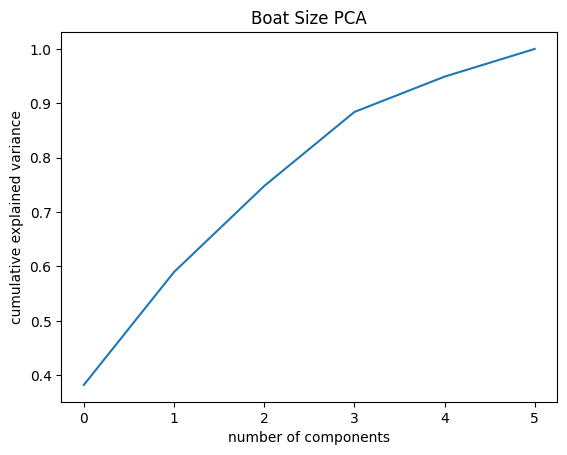

c:\Users\a1224\Henry Heppe\SeminarML3\SeminarML\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


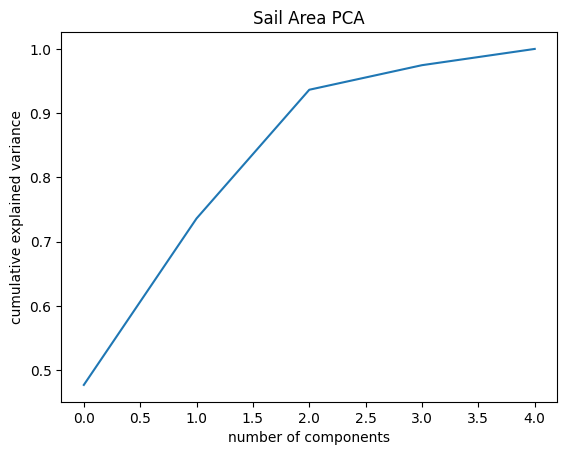

In [22]:
df_freq_PCA = df_freq.copy()
#apply pca to 'Certified No of Persons', 'No. of Cabins', 'No. of berths', 'No of Bathrooms', 'Toilets', 'Showers'
pca = PCA(n_components=6)
relevant_cols = ['Certified No. of Persons', 'No. of Cabins', 'No. of berths', 'No. of Bathrooms', 'Toilets', 'Showers']
pca.fit(StandardScaler().fit_transform(df_freq_PCA[relevant_cols]))
df_freq_PCA['Boat Size Component'] = pca.transform(df_freq_PCA[relevant_cols])[:,0]
df_freq_PCA = df_freq_PCA.drop(relevant_cols, axis=1)

#plot the scree plot for the pca
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Boat Size PCA')
plt.show()

#apply to sail area
pca = PCA(n_components=5)
relevant_cols = ['Mainsail Area', 'Jib Area', 'Genoa Area', 'Gennaker Area', 'Spinnaker Area']
pca.fit(StandardScaler().fit_transform(df_freq_PCA[relevant_cols]))
df_freq_PCA['Sail Area Component'] = pca.transform(df_freq_PCA[relevant_cols])[:,0]
df_freq_PCA = df_freq_PCA.drop(relevant_cols, axis=1)

#plot the scree plot for the pca
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Sail Area PCA')
plt.show()

create df_freq_noNanCat dataset (in research report noNanCat is called BaseCat)

In [9]:
df_freq_noNanCat = df_freq
df_freq_noNanCat = df_freq_noNanCat.loc[:,~df_freq_noNanCat.columns.str.contains('_nan')]

save all datasets to csv

In [10]:
df_nan.to_csv('final_data_files/1_df_nan.csv', sep=',')
df_man.to_csv('final_data_files/2_df_man.csv', sep=',')
df_man_PCA.to_csv('final_data_files/3_df_man_PCA.csv', sep=',')
df_man_noNanCat.to_csv('final_data_files/4_df_man_noNanCat.csv', sep=',')
df_freq.to_csv('final_data_files/5_df_freq.csv', sep=',')
df_freq_PCA.to_csv('final_data_files/6_df_freq_PCA.csv', sep=',')
df_freq_noNanCat.to_csv('final_data_files/7_df_freq_noNanCat.csv', sep=',')

In [7]:
boatsDF = df_nan